In [1]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

In [2]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [3]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [4]:
import pandas as pd

In [5]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [6]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [7]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [8]:
nutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [26]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
    
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [27]:
nutrients.duplicated().sum()

14179

In [28]:
nutrients = nutrients.drop_duplicates()

In [29]:
col_mapping = {'description': 'food', 'group': 'food_group'}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   food_group    6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [30]:
col_mapping = {'description': 'nutrient', 'group': 'nutrient_group'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutrient_group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [31]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   value           375176 non-null  float64
 1   units           375176 non-null  object 
 2   nutrient        375176 non-null  object 
 3   nutrient_group  375176 non-null  object 
 4   id              375176 non-null  int64  
 5   food            375176 non-null  object 
 6   food_group      375176 non-null  object 
 7   manufacturer    293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


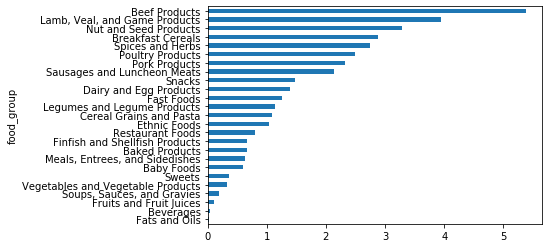

In [32]:
result = ndata.groupby(['nutrient', 'food_group'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [33]:
by_nutrient = ndata.groupby(['nutrient_group', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
min_foods = by_nutrient.apply(get_minimum)[['value', 'food']]

In [34]:
max_foods

value  \
nutrient_group nutrient                                 
Amino Acids    Alanine                          8.009   
               Arginine                         7.436   
               Aspartic acid                   10.203   
               Cystine                          1.307   
               Glutamic acid                   17.452   
...                                               ...   
Vitamins       Vitamin D2 (ergocalciferol)     28.100   
               Vitamin D3 (cholecalciferol)    27.400   
               Vitamin E (alpha-tocopherol)   149.400   
               Vitamin E, added                46.550   
               Vitamin K (phylloquinone)     1714.500   

                                                                                          food  
nutrient_group nutrient                                                                         
Amino Acids    Alanine                                       Gelatins, dry powder, unsweetened  
               Arginine                                           Seeds, sesame flour, low-fat  
               Aspartic acid                                               Soy protein isolate  
               Cystine                            Seeds, cottonseed flour, low fat (glandless)  
               Glutamic acid                                               Soy protein isolate  
...                                                                                        ...  
Vitamins       Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
               Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
               Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
               Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
               Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

In [36]:
min_foods

value  \
nutrient_group nutrient                              
Amino Acids    Alanine                         0.0   
               Arginine                        0.0   
               Aspartic acid                   0.0   
               Cystine                         0.0   
               Glutamic acid                   0.0   
...                                            ...   
Vitamins       Vitamin D2 (ergocalciferol)     0.1   
               Vitamin D3 (cholecalciferol)    0.0   
               Vitamin E (alpha-tocopherol)    0.0   
               Vitamin E, added                0.0   
               Vitamin K (phylloquinone)       0.0   

                                                                                          food  
nutrient_group nutrient                                                                         
Amino Acids    Alanine                                                          Vinegar, cider  
               Arginine                                                         Vinegar, cider  
               Aspartic acid                                                    Vinegar, cider  
               Cystine                                                          Vinegar, cider  
               Glutamic acid                                                    Vinegar, cider  
...                                                                                        ...  
Vitamins       Vitamin D2 (ergocalciferol)          Mushrooms, brown, Italian, or Crimini, raw  
               Vitamin D3 (cholecalciferol)          Milk, buttermilk, fluid, cultured, lowfat  
               Vitamin E (alpha-tocopherol)  Milk, dry, nonfat, regular, without added vita...  
               Vitamin E, added                                                Cheese, cheddar  
               Vitamin K (phylloquinone)     Milk, nonfat, fluid, with added vitamin A and ...  

[94 rows x 2 columns]

In [37]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 